In [51]:
df = pd.read_csv("adult.csv", sep=",")
df.columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "class"]
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,True
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,True
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,True
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,True
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,True


In [52]:
df = df[df["workclass"] != '?']
df = df[df["education"] != '?']
df = df[df["marital-status"] != '?']
df = df[df["occupation"] != '?']
df = df[df["relationship"] != '?']
df = df[df["race"] != '?']
df = df[df["sex"] != '?']
df = df[df["native-country"] != '?']
df['class']=df['class'].apply(lambda x: "<=50K" if x is True else ">50K")
below = df[df["class"] == "<=50K"]
above = df[df["class"] == ">50K"]

In [53]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [54]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
class             object
dtype: object

In [55]:
plt.figure(figsize=(10,10))

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [56]:
plt.rcParams['axes.facecolor'] = 'whitesmoke'

Text(0, 0.5, 'education(years)')

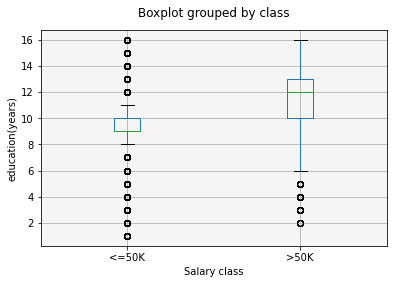

In [57]:
df[['education-num','class']].boxplot(column='education-num',by=['class'])
plt.title("")
plt.xlabel("Salary class")
plt.ylabel("education(years)")

In [68]:
df['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [71]:
df['education_bach']=df['education'].apply(lambda x:'Bachelors & Above' if x.strip() in ['Bachelors','Masters','Doctorate','Prof-school','Assoc-voc','Assoc-acdm'] else "Below Bachelors")

In [72]:
df['education_bach'].value_counts()

Below Bachelors      22045
Bachelors & Above    10516
Name: education_bach, dtype: int64

Text(0, 0.5, 'Percentage')

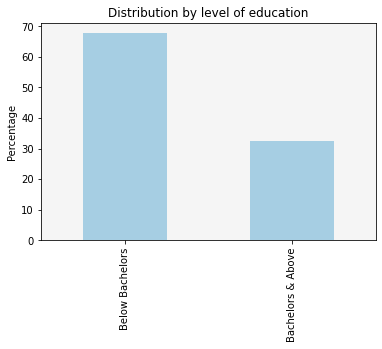

In [73]:
fig, ax = plt.subplots()
df['education_bach'].value_counts(normalize=True).mul(100).round(1).plot(kind='bar',colormap='Paired')
plt.title("Distribution by level of education")
plt.ylabel("Percentage")

Text(0, 0.5, 'Percentage')

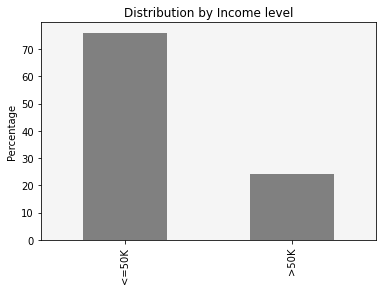

In [74]:
df['class'].value_counts(normalize=True).mul(100).round(1).plot(kind='bar',color='grey')
plt.title("Distribution by Income level")
plt.ylabel("Percentage")